In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import re


In [2]:
xg_dict = {
    0: (-1., 1.5),
    1: (-1., -1.5),
    2: (1., -1.5),
    3: (1., 1.5),
    4: (1.5, 1.5),
    5: 9.2
    # Add more n: xg pairs as needed
}

## Gradient

In [4]:
def get_gradient_from_file(i):
    if i==0:
        file_path = f'../examples/data/urdf/gradient.csv'
    else:
        file_path = f'../examples/data/urdf/gradient{i}.csv'
    df = pd.read_csv(file_path, header=None)
    grad_6_6= df[~df[4].isna()].reset_index(drop=True)
    #grad_4_4= df[df[4].isna()].reset_index(drop=True).iloc[:, :-2]
    return grad_6_6

def plot_gradient_values(df,n):
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(6, 8))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        axes[i].plot(df.index, df[col])
        axes[i].set_title(f"Element {col}") 
        axes[i].set_xlabel('Iteration')
        axes[i].set_ylabel('Value')
    plt.tight_layout()
    plt.show()

def plot_gradient_density(df,n):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.kdeplot(df[col], ax=axes[i],fill=True)
        # axes[i].scatter(df[col], np.zeros_like(df[col]), color='red', alpha=0.5, label='Data Points')      
        axes[i].hist(df[col], bins=30, color="purple", density=True, alpha=0.2, edgecolor='grey')  # Density=True normalizes to form a probability density  
        axes[i].set_title(f"Element {col}")  
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
    fig.suptitle(f'Density Distribution of Cost Gradient Elements xg is {xg_dict.get(n)}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def gaussian(x, a, b, c):
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))

def fit_with_one_gaussian(df,n):
    initial_guess = [1, 0, 1]
    popt, pcov = curve_fit(gaussian, x_data, y_data, p0=initial_guess)


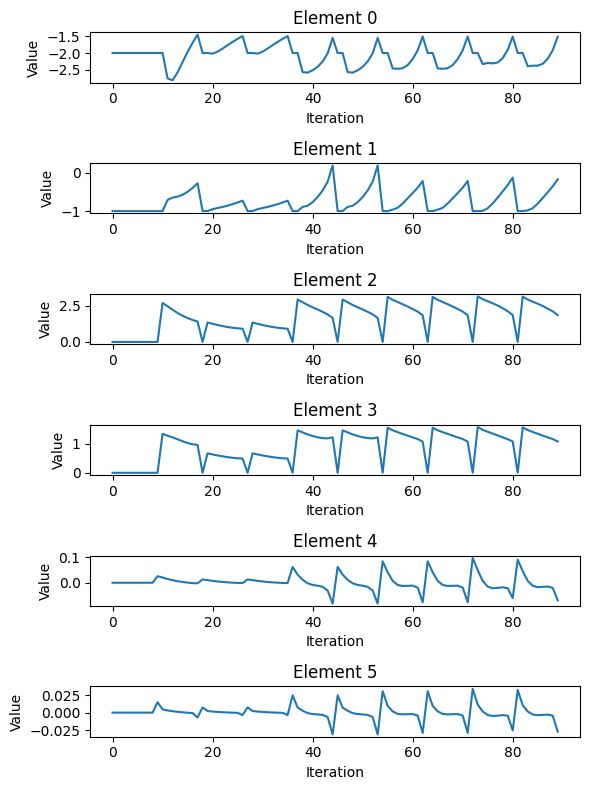

In [5]:
n=0
grad= get_gradient_from_file(n)
plot_gradient_values(grad,n)

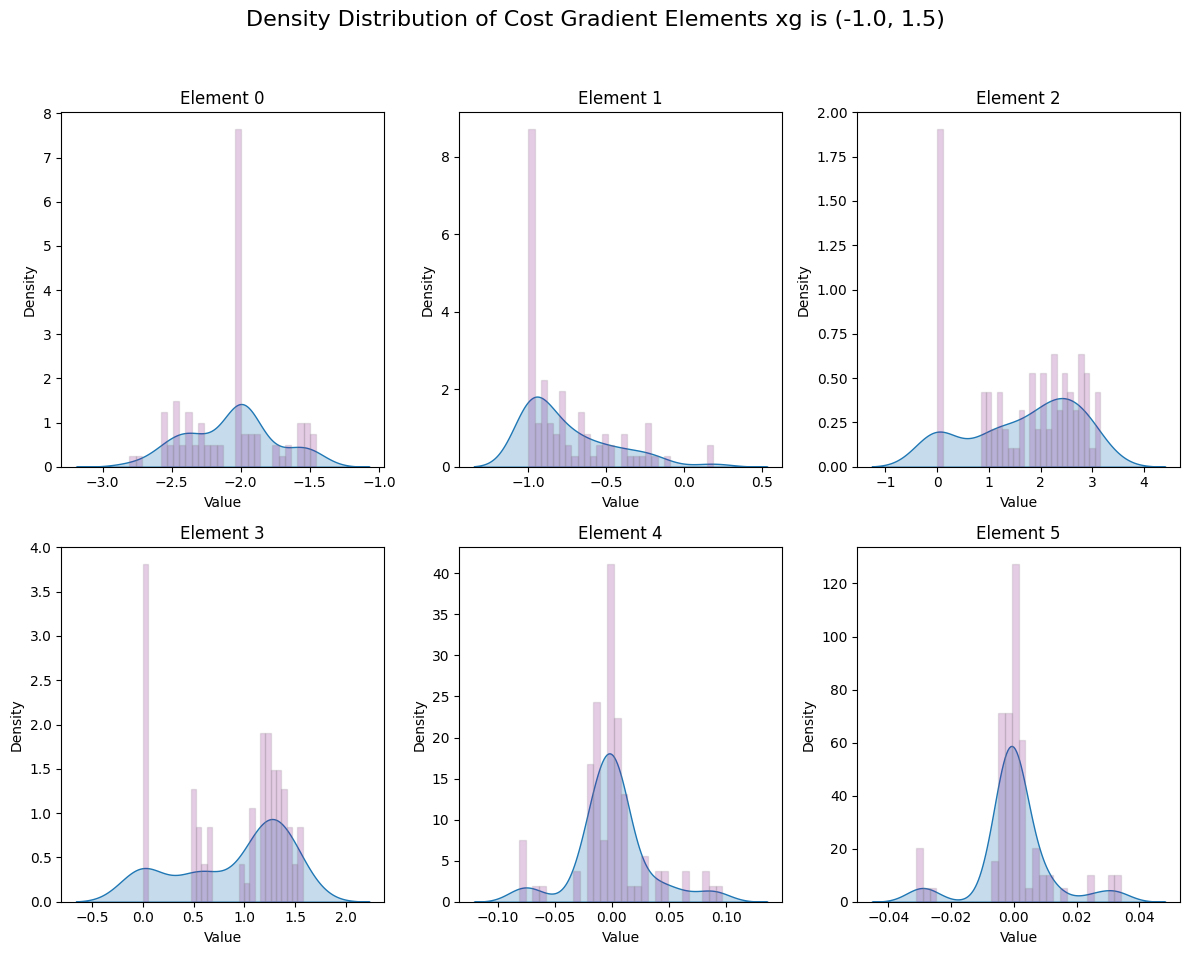

In [53]:
n=0
grad= get_gradient_from_file(n)
plot_gradient_density(grad,n)

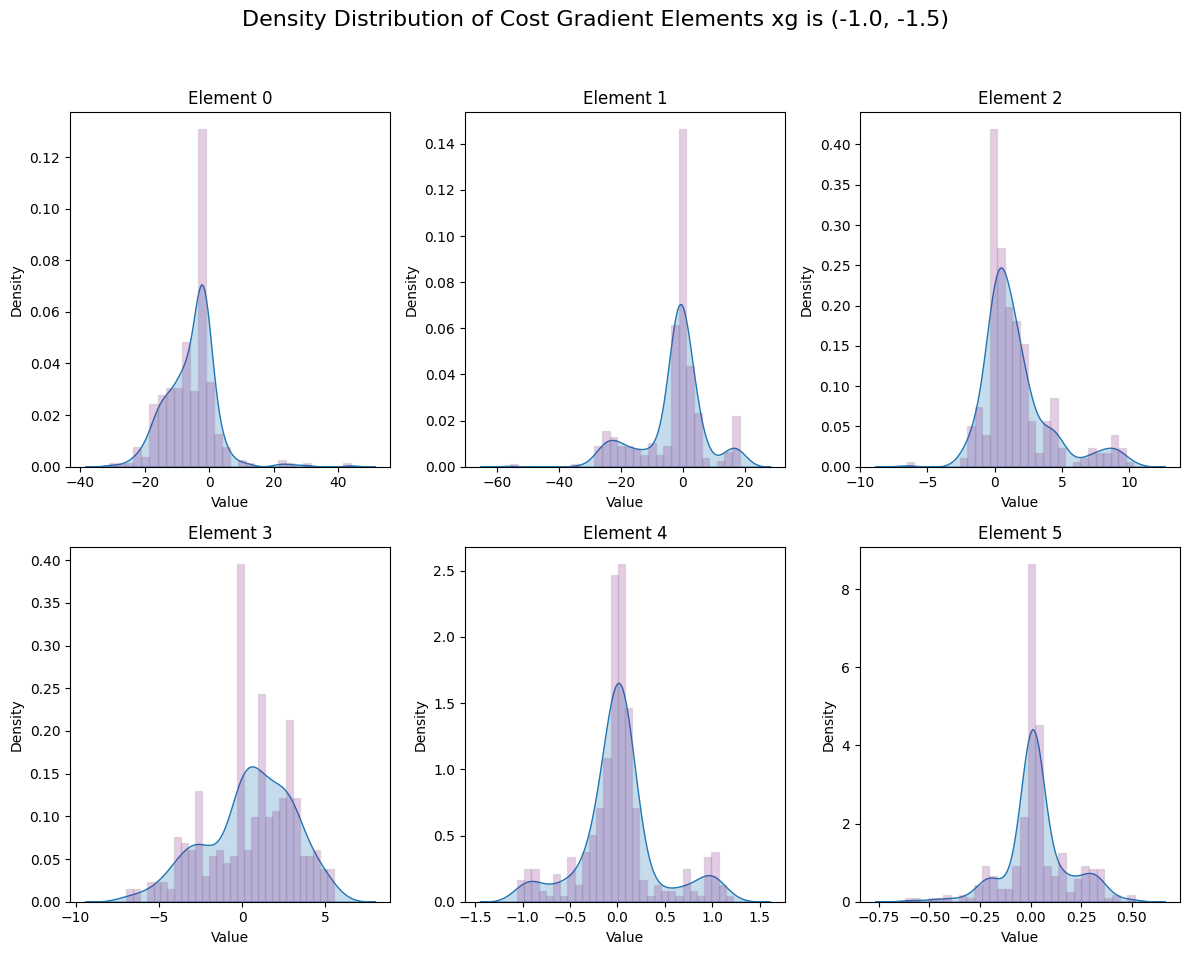

In [54]:
n=1
grad= get_gradient_from_file(n)
plot_gradient_density(grad,n)

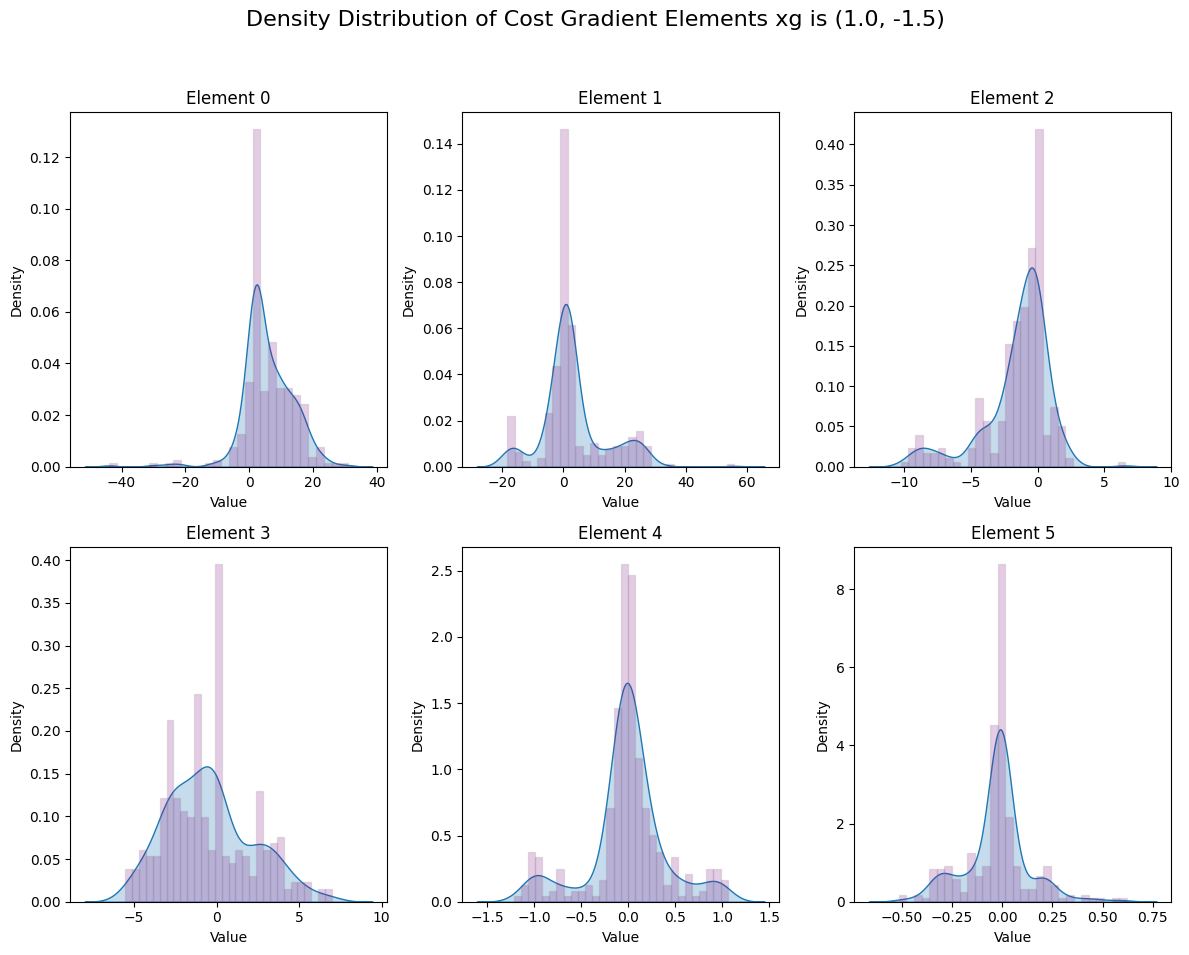

In [55]:
n=2
grad= get_gradient_from_file(n)
plot_gradient_density(grad,n)

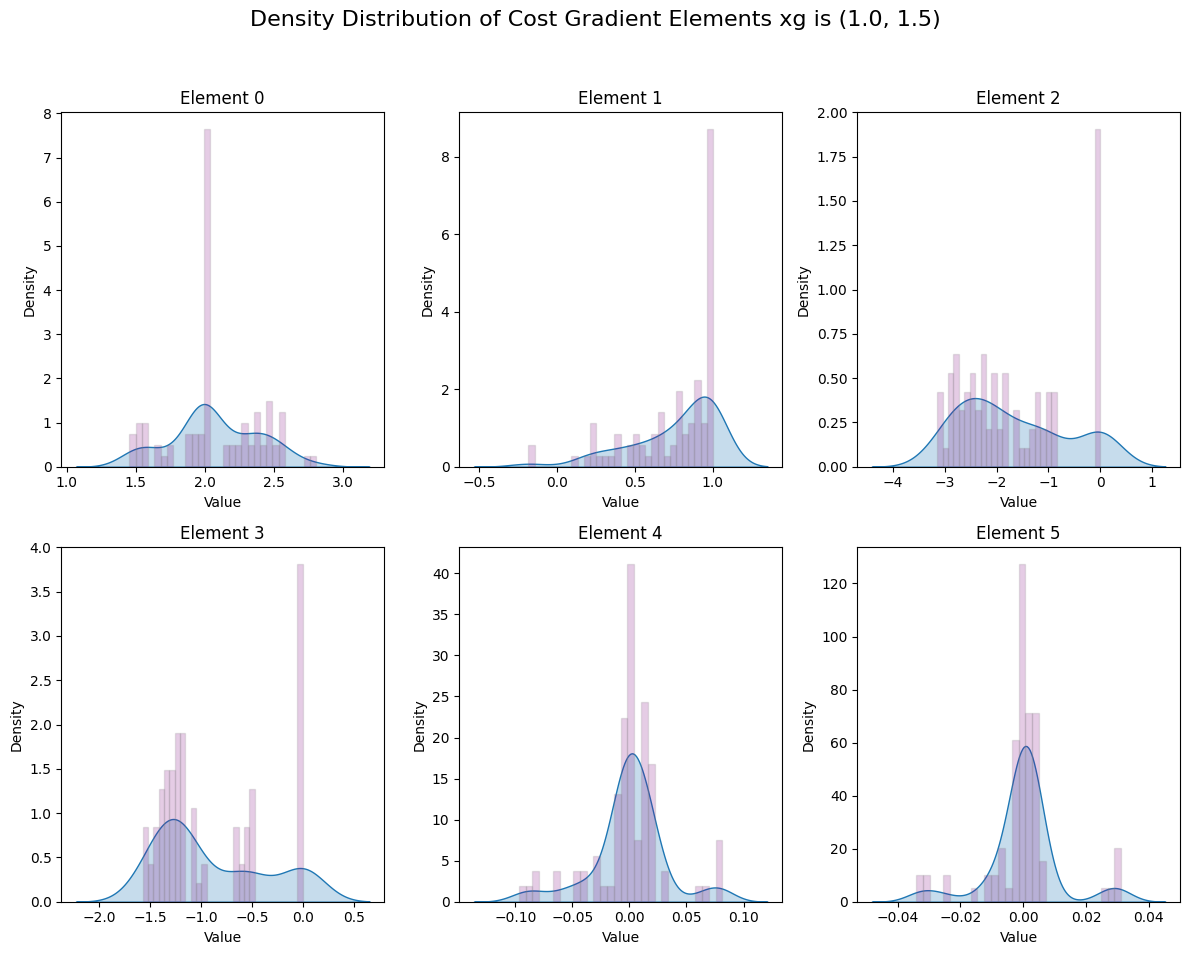

In [56]:
n=3
grad= get_gradient_from_file(n)
plot_gradient_density(grad,n)

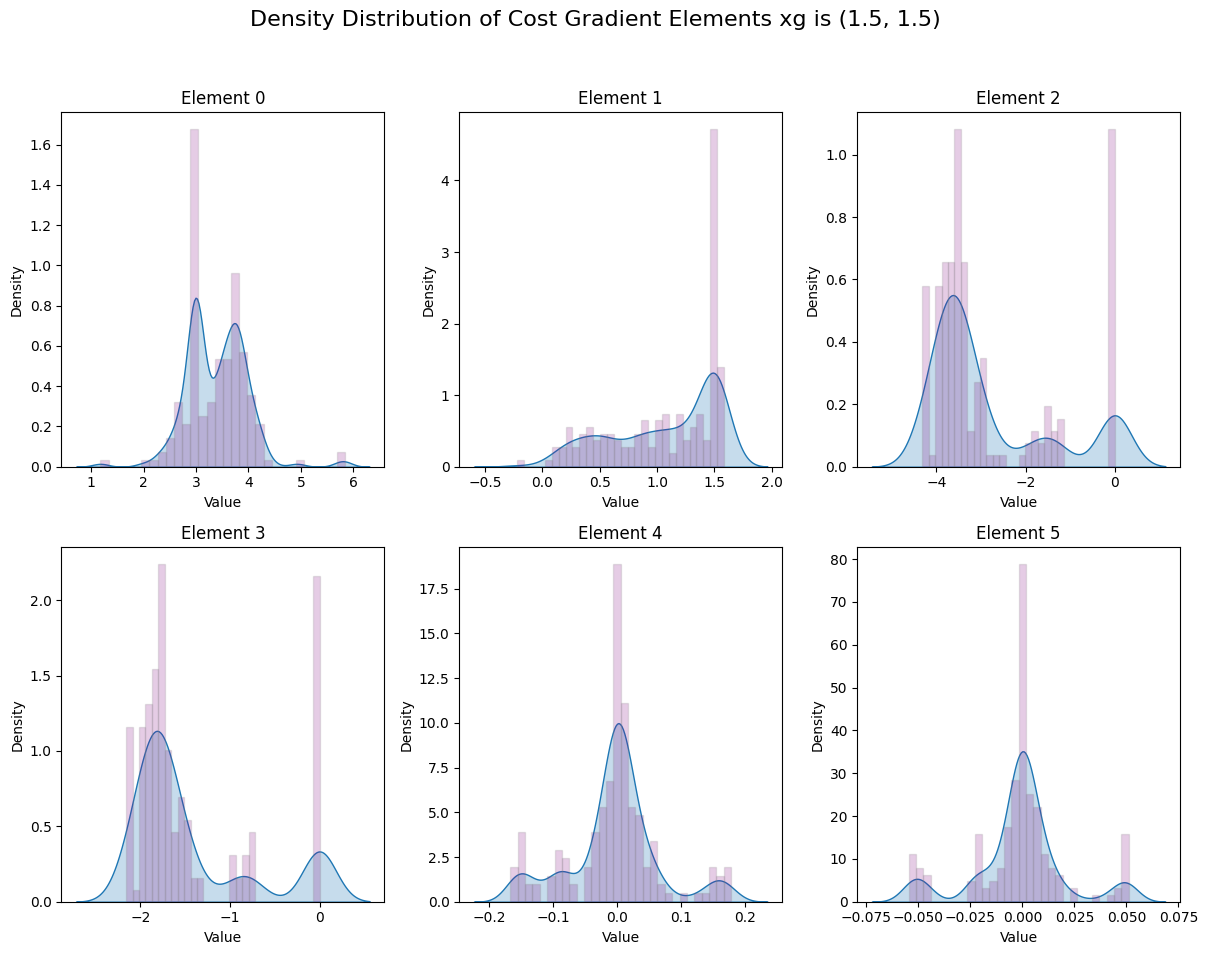

In [59]:
n=4
grad= get_gradient_from_file(n)
plot_gradient_density(grad,n)

Would be interesting to investigate when those huge peaks occur ?

### Minv

In [77]:
def get_minv_from_file(i):
    file_path = f'../examples/data/urdf/minv{n}.csv'
    pattern = r'\[([^\]]+)\],\[([^\]]+)\]'
    data = {0: [], 1: [], 2: [], 3: []}

    with open(file_path, 'r') as file:
        for line in file:
            match = re.match(pattern, line)
            if match:
                values1 = match.group(1).strip().split()
                values2 = match.group(2).strip().split()
                if len(values1) == 2 and len(values2) == 2:
                    data[0].append(float(values1[0]))
                    data[1].append(float(values1[1]))
                    data[2].append(float(values2[0]))
                    data[3].append(float(values2[1]))

    df = pd.DataFrame(data)
    return df


def plot_minv_density(df,n):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.kdeplot(df[col], ax=axes[i],fill=True)
        axes[i].hist(df[col], bins=30, color="purple", density=True, alpha=0.2, edgecolor='grey')  # Density=True normalizes to form a probability density  
        axes[i].set_title(f"Element {col}")  
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Density')
    fig.suptitle(f'Density Distribution of Minv Matrix Elements, xg is {xg_dict.get(n)}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


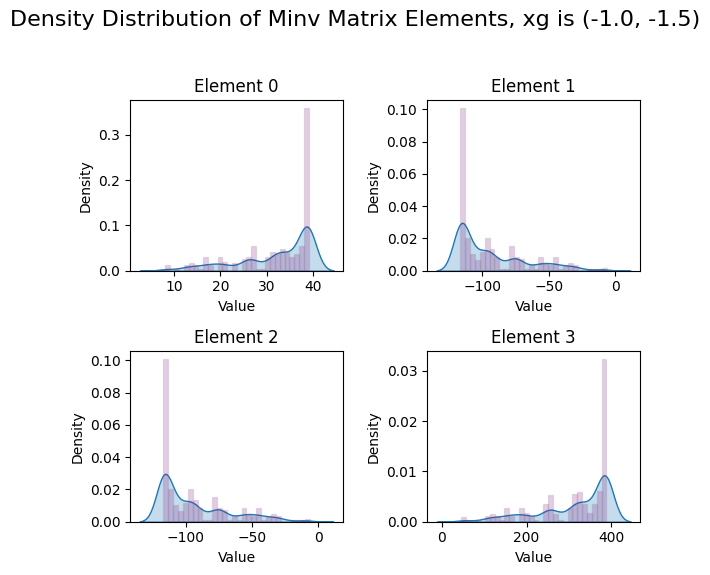

In [79]:
n=1
df=get_minv_from_file(n)
plot_minv_density(df,n)

In [ ]:
n=2
df=get_minv_from_file(n)
plot_minv_density(df,n)

In [ ]:
n=3
df=get_minv_from_file(n)
plot_minv_density(df,n)

In [ ]:
n=4
df=get_minv_from_file(n)
plot_minv_density(df,n)